# Pymaceuticals Inc.
---
Analysis

For Challenge 5, to screen potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer, a complete data set from a mice study was provided to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against other treatment regimens. Key findings of the analysis are:

According to a bar chart plotted for the total number of rows for Mouse ID/Timepoints for each drug regimen throughout the study, Ramicane and Capomulin appear to be more counts than Infubinol and Ceftamin out of the four treatments of interest.

A pie chart showing the distribution of female and male mice in the study indicated that the number of males and females used in the study was even.

A line plot for a single mouse treated with Capomulin, showing tumor volume versus time point, indicated that the tumor size continued to increase until 20 days and after that tumor size began to reduce with some variations in growth.

A scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen showed a positive correlation.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy import stats
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results ,
                                 how='right', on='Mouse ID')
combined_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.

unique_mice_count = combined_df['Mouse ID'].nunique()

unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the Mouse IDs with duplicates
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mouse_ids




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_df[combined_df['Mouse ID'].isin(duplicate_rows['Mouse ID'])]
duplicate_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of unique mice in the clean DataFrame.

cleandata_mice = clean_df["Mouse ID"].nunique()

cleandata_mice



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen' and calculate summary statistics
grouped = combined_df.groupby('Drug Regimen')

# Calculate each statistic
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

# Combine the statistics into a summary DataFrame and rename the coloumn headers. 
summary_df1 = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})


summary_df1




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)


summary_df2


,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

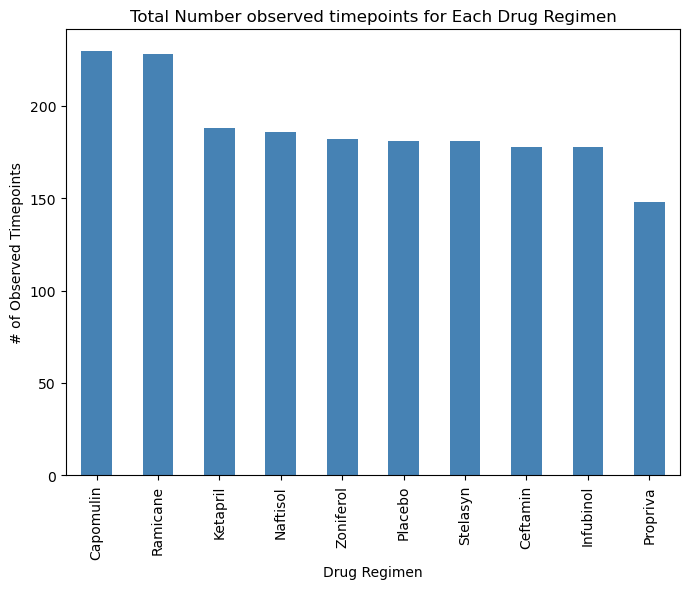

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count rows
drug_counts = clean_df.groupby('Drug Regimen').size().reset_index(name='Count')

# Set 'Drug Regimen' as index for plotting
drug_counts.set_index('Drug Regimen', inplace=True)

# Sort by 'Count' in descending order
drug_counts = drug_counts.sort_values(by='Count', ascending=False)

# Plotting directly from DataFrame
ax = drug_counts.plot(kind='bar', color='steelblue', legend=False, figsize=(7, 6))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Timepoints')
ax.set_title('Total Number observed timepoints for Each Drug Regimen')

# Optionally, rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig("Images/Barchart_TotalMouse_Drug_pandas.png")

plt.show()



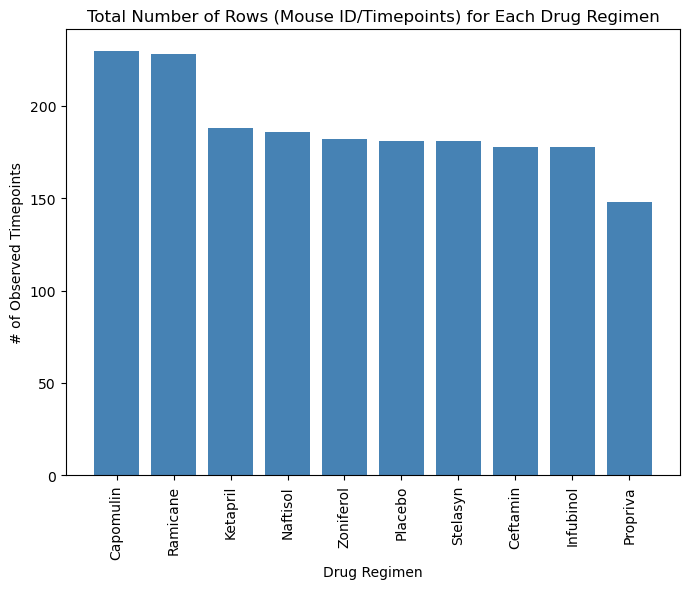

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count rows
drug_counts = clean_df.groupby('Drug Regimen').size().reset_index(name='Count')

# Sort by 'Count' in descending order
drug_counts = drug_counts.sort_values(by='Count', ascending=False)


# Create bar plot
plt.figure(figsize=(7, 6))
plt.bar(drug_counts['Drug Regimen'], drug_counts['Count'], color='steelblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/Barchart_TotalMouse_Drug_pyplot.png")

plt.show()

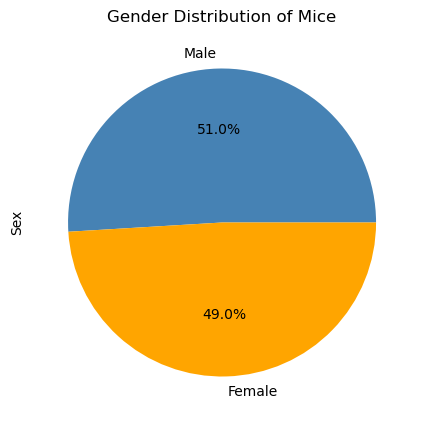

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas\

# Calculate the count of male and female mice
gender_distribution = clean_df['Sex'].value_counts()

# Plot the pie chart using Pandas
plt.figure(figsize=(5, 5))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['steelblue', 'orange'])
plt.ylabel('Sex')  
plt.title('Gender Distribution of Mice')

plt.savefig("Images/GenderDistribution_Pie_pandas.png")

plt.show()





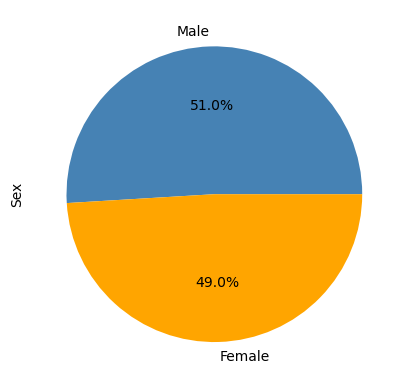

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = clean_df['Sex'].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = sex_counts.values

# The colors of each section of the pie chart
colors = ["steelblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=360)
plt.ylabel('Sex')

plt.savefig("Images/GenderDistribution_Pie_pyplot.png")

plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Filter for specific treatment regimens
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatments_of_interest)]

# Find the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()


# Merge to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(filtered_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Reset the index of the DataFrame
final_tumor_volumes.reset_index(drop=True, inplace=True)

final_tumor_volumes


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,u153,Ceftamin,Female,11,25,0,45.000000,0
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,x226,Ceftamin,Male,23,28,0,45.000000,0
3,t573,Ceftamin,Female,15,27,0,45.000000,0
4,c326,Infubinol,Female,18,25,5,36.321346,0
...,...,...,...,...,...,...,...,...
95,a644,Ramicane,Female,7,17,45,32.978522,1
96,i177,Ramicane,Male,10,18,45,33.562402,3
97,r944,Capomulin,Male,12,25,45,41.581521,2
98,u364,Capomulin,Male,18,17,45,31.023923,3


In [14]:


# Put treatments into a list for for loop (and later for plot labels)

# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to store tumor volume data for each regimen
tumor_vol_data = []

# Create empty dictionary to store potential outliers
outliers = {}


# Step 3: Calculate the IQR and determine potential outliers for each treatment
for treatment in treatments:
    # Filter data for the current treatment
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append treatment data to list
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"----- {treatment} Treatment -----")
    
    print(f"Potential Outliers: {outliers}\n")
    


----- Capomulin Treatment -----
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Ramicane Treatment -----
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Infubinol Treatment -----
Potential Outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64

----- Ceftamin Treatment -----
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



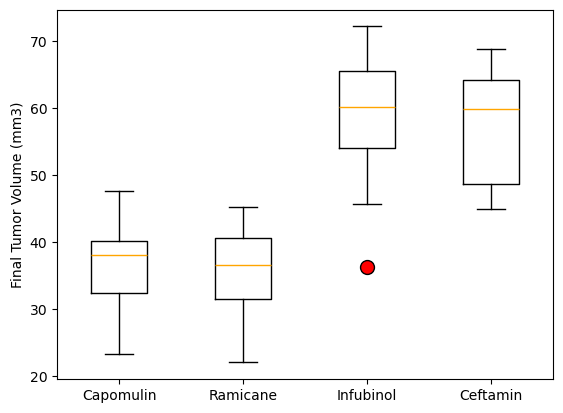

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Create a box plot
boxplot = ax1.boxplot(tumor_vol_data, labels=treatments, medianprops=dict(color='orange'), flierprops=dict(marker='o', markerfacecolor ='red', markersize=10))


# Save the boxplot as an image file
plt.savefig("data/boxplot_finalTumorVol.png")


plt.show()






## Line and Scatter Plots

In [16]:
# Get list of unique Mouse IDs
mouse_ids = final_tumor_volumes['Mouse ID'].unique()

print("List of Mouse IDs:")
print(mouse_ids)


List of Mouse IDs:
['u153' 'b447' 'x226' 't573' 'c326' 'w678' 'v339' 'm756' 'o813' 'h531'
 'l558' 'w150' 'y449' 'v766' 'r157' 'f436' 'f966' 'v719' 'w193' 'u149'
 'b487' 's121' 'r921' 'c895' 'c458' 'q132' 'a577' 'w584' 'b759' 'n671'
 'l490' 'o809' 'k804' 'j246' 'q610' 'q483' 'i386' 'n364' 'b128' 'l661'
 'y865' 'y769' 't565' 'l509' 'j296' 'a411' 'q597' 'g288' 'y163' 'i334'
 'c139' 'z581' 'a251' 'r554' 'k483' 'w151' 'g316' 'a685' 's508' 'y793'
 'z578' 'm957' 'e662' 'e476' 'a203' 'f345' 'm546' 'l471' 'k403' 'l897'
 'v923' 'c758' 'j989' 'b742' 'j913' 'a444' 'w914' 'm601' 'd251' 'x401'
 's185' 'i738' 's710' 'x581' 'a275' 'a520' 'k210' 'j119' 'x822' 'l733'
 'u196' 'g791' 'o287' 'r811' 'i557' 'a644' 'i177' 'r944' 'u364' 'p438']


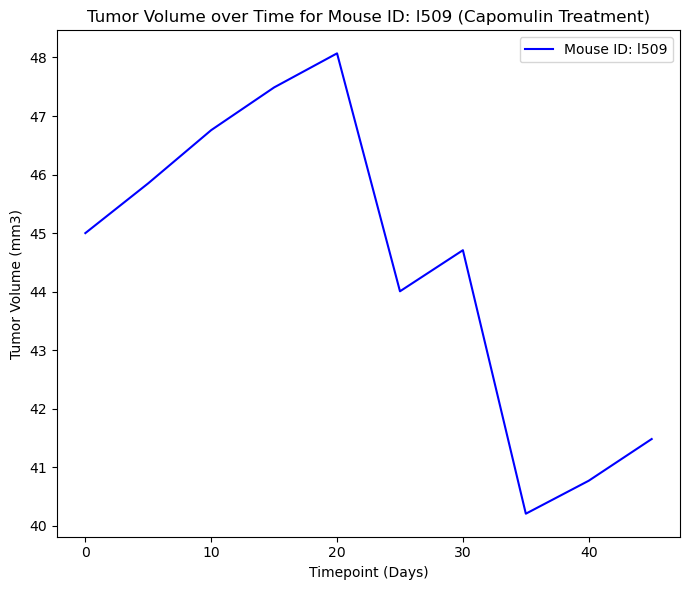

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select data for a single mouse treated with Capomulin. id to use us l509
mouse_id = 'l509'
capomulin_mouse_data = clean_df[clean_df['Mouse ID'] == mouse_id]

# Generate line plot
plt.figure(figsize=(7, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], color='b', label=f'Mouse ID: {mouse_id}')
plt.title(f'Tumor Volume over Time for Mouse ID: {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.tight_layout()

plt.savefig("Images/linegraph_TumVol_Weight.png")

plt.show()

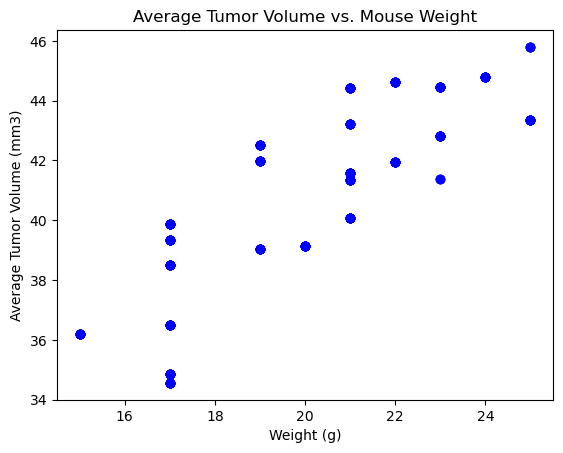

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 1: Calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)


# Step 2: Merge to get the weight of each mouse
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']]
capomulin_data = pd.merge(average_tumor_vol, mouse_weight, on='Mouse ID')

# Step 3: Plotting the data
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Average Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight')


plt.savefig("Images/Scatter_Av_Tum_Vol_Weight.png")

plt.show()


## Correlation and Regression

Correlation coefficient: 0.83


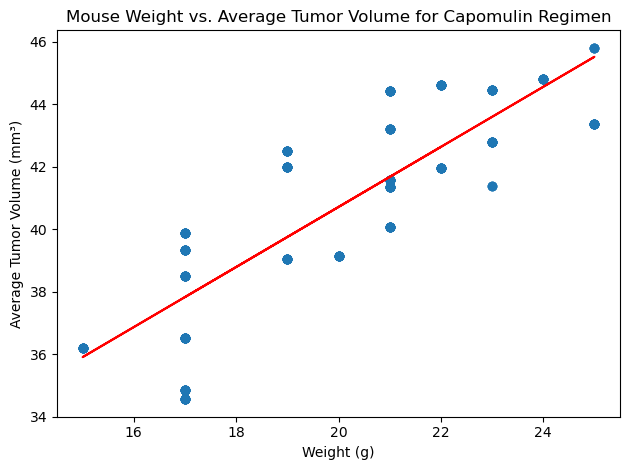

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = np.corrcoef(capomulin_data['Weight (g)'], capomulin_data['Average Tumor Volume (mm3)'])[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')

# Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Average Tumor Volume (mm3)'])

# Generate regression line
regress_values = capomulin_data['Weight (g)'] * slope + intercept

# Plot the data and regression line
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Average Tumor Volume (mm3)'], marker='o')
plt.plot(capomulin_data['Weight (g)'], regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.tight_layout()

plt.savefig("Images/Scatter_Av_Tum_Vol_Correlation.png")

plt.show()



In [40]:
#regression 

print(f'Linear regression model: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')
print(f'p-value: {p_value:.2e}')
print(f'Standard error: {std_err:.2f}')

Linear regression model: y = 0.96x + 21.49
R-squared: 0.70
p-value: 6.50e-61
Standard error: 0.04
